In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from primes import primesfrom2to

In [138]:
primes = primesfrom2to(10**7)

In [139]:
len(primes)

664579

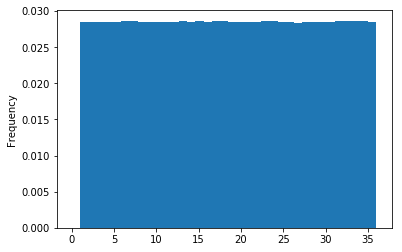

In [140]:
pd.Series(primes % 37).plot(kind='hist', bins=37, density=True)

In [249]:
N = 100
mods = pd.DataFrame(columns=primes[:N])
for p in primes[:N]:
    mods[p] = primes % p

In [276]:
k = primes[90]
a = mods.loc[mods[k].idxmin() + 1 :,[k]]
b = a.assign(cond=a.shift(-1)).dropna()
cnts = b.pivot_table(index='cond', columns=k, aggfunc='size')

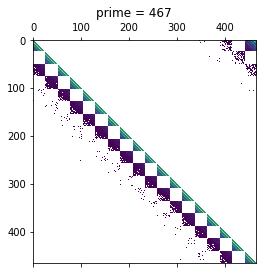

In [277]:
plt.matshow(cnts)
plt.suptitle('prime = ' + str(k));

In [278]:
cnts.fillna(0).head()

467,1,2,3,4,5,6,7,8,9,10,...,457,458,459,460,461,462,463,464,465,466
cond,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,118.0,0.0,94.0,0.0,225.0,0.0,148.0,0.0,117.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,174.0,0.0,123.0,0.0,99.0,0.0,247.0,0.0,133.0,0.0
3.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,139.0,0.0,124.0,0.0,77.0,0.0,203.0,0.0,137.0
4.0,0.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,0.0,167.0,0.0,150.0,0.0,103.0,0.0,215.0,0.0
5.0,119.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,83.0,0.0,155.0,0.0,123.0,0.0,89.0,0.0,227.0


In [279]:
distrs = b.assign(
    tmp=b.astype(float).diff(axis=1).iloc[:,-1],
    tmp1=b.apply(tuple, axis=1)
).groupby('tmp').tmp1.value_counts().sort_index()

In [280]:
distrs

tmp     tmp1          
-465.0  (466.0, 1.0)      117
-463.0  (464.0, 1.0)      148
        (465.0, 2.0)      133
        (466.0, 3.0)      137
-461.0  (462.0, 1.0)      225
        (463.0, 2.0)      247
        (464.0, 3.0)      203
        (465.0, 4.0)      215
        (466.0, 5.0)      227
-459.0  (460.0, 1.0)       94
        (461.0, 2.0)       99
        (462.0, 3.0)       77
        (463.0, 4.0)      103
        (464.0, 5.0)       89
        (465.0, 6.0)       95
        (466.0, 7.0)       88
-457.0  (458.0, 1.0)      118
        (459.0, 2.0)      123
        (460.0, 3.0)      124
        (461.0, 4.0)      150
        (462.0, 5.0)      123
        (463.0, 6.0)      130
        (464.0, 7.0)      126
        (465.0, 8.0)      137
        (466.0, 9.0)      117
-455.0  (456.0, 1.0)      143
        (457.0, 2.0)      174
        (458.0, 3.0)      139
        (459.0, 4.0)      167
        (460.0, 5.0)      155
                         ... 
 118.0  (20.0, 138.0)       1
        (62.0, 18